In [2]:
import sys
import sklearn
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

#Extracting the column names from website

In [3]:
colnames = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","una1","una2","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","result"]
# len(colnames)

#Get the data

In [4]:
import pandas as pd
from zipfile import ZipFile
from urllib.request import urlopen
import io

f = urlopen('https://raw.githubusercontent.com/AkshatGarg7/DDOS-Detection-using-Machine-Learning/master/Dataset/dataset.zip').read()
zip_file = ZipFile(io.BytesIO(f))

train_df = pd.read_csv(zip_file.open('kddcup.csv'),header = None,names = colnames)
print("train_df shape -> ",train_df.shape)
test_df = pd.read_csv(zip_file.open('corrected.csv'),header = None,names = colnames)
print("test_df shape -> ",test_df.shape)

train_df shape ->  (494021, 42)
test_df shape ->  (311029, 42)


#Data Manpulation and Analysis using Pandas framework

In [5]:
frames = [train_df,test_df]
df = pd.concat(frames)
print("df shape -> ",df.shape)

df shape ->  (805050, 42)


In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,una1,una2,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,una1,una2,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,805050.000000,8.050500e+05,8.050500e+05,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.0,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000
mean,36.359298,2.525712e+03,8.219626e+02,0.000039,0.004242,0.000029,0.026853,0.001006,0.157608,0.010611,0.000145,0.000031,0.010196,0.001035,0.000099,0.000917,0.0,0.000015,0.001787,307.930861,270.758604,0.131302,0.131246,0.090332,0.090376,0.800861,0.022321,0.027588,233.557149,192.733230,0.769123,0.028606,0.581066,0.005865,0.131169,0.130988,0.090780,0.089974
std,609.751312,7.781862e+05,2.775406e+04,0.006205,0.108576,0.007476,0.642713,0.033383,0.364373,1.861771,0.012055,0.007136,2.072957,0.141821,0.011795,0.033939,0.0,0.003861,0.042241,217.927765,245.230221,0.336674,0.337131,0.285153,0.285685,0.382048,0.092618,0.136034,63.307144,103.989036,0.402258,0.104378,0.486165,0.039810,0.335943,0.336595,0.283095,0.283886
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.100000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,103.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,114.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,469.000000,458.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.030000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.203179e+06,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,100.000000,5.000000,8.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull().sum() 
#so no data is null in df

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
una1                           0
una2      

In [9]:
pd.Series(df.protocol_type.value_counts(ascending=True))

udp      47057
tcp     309422
icmp    448571
Name: protocol_type, dtype: int64

In [10]:
pd.Series(df.result.value_counts(ascending=True))

udpstorm.                2
worm.                    2
sqlattack.               2
spy.                     2
xsnoop.                  4
perl.                    5
phf.                     6
xlock.                   9
ftp_write.              11
loadmodule.             11
xterm.                  13
imap.                   13
ps.                     16
sendmail.               17
named.                  17
rootkit.                23
multihop.               25
land.                   30
buffer_overflow.        52
httptunnel.            158
nmap.                  315
pod.                   351
saint.                 736
processtable.          759
apache2.               794
teardrop.              991
warezclient.          1020
mscan.                1053
portsweep.            1394
ipsweep.              1553
warezmaster.          1622
snmpguess.            2406
satan.                3222
back.                 3301
guess_passwd.         4420
mailbomb.             5000
snmpgetattack.        7741
n

In [11]:
df['service'].unique()

array(['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp',
       'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data',
       'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh',
       'name', 'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf',
       'nntp', 'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer',
       'efs', 'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard',
       'systat', 'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2',
       'sunrpc', 'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm',
       'sql_net', 'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i',
       'X11', 'urp_i', 'pm_dump', 'tftp_u', 'tim_i', 'red_i', 'icmp'],
      dtype=object)

In [12]:
df['flag'].unique()

array(['SF', 'S1', 'REJ', 'S2', 'S0', 'S3', 'RSTO', 'RSTR', 'RSTOS0',
       'OTH', 'SH'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

df['protocol_type'] = number.fit_transform(df['protocol_type'])
df['service'] = number.fit_transform(df['service'])
df['flag'] = number.fit_transform(df['flag'])

df["result"] = np.where(df.result == "normal.",1,0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805050 entries, 0 to 311028
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     805050 non-null  int64  
 1   protocol_type                805050 non-null  int64  
 2   service                      805050 non-null  int64  
 3   flag                         805050 non-null  int64  
 4   src_bytes                    805050 non-null  int64  
 5   dst_bytes                    805050 non-null  int64  
 6   land                         805050 non-null  int64  
 7   wrong_fragment               805050 non-null  int64  
 8   urgent                       805050 non-null  int64  
 9   hot                          805050 non-null  int64  
 10  num_failed_logins            805050 non-null  int64  
 11  logged_in                    805050 non-null  int64  
 12  num_compromised              805050 non-null  int64  
 13 

In [15]:
##Train Test Split to overcome overfitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['result'],axis=1),df['result'],test_size=0.3,random_state=1)

**Feature Selection - CORRELATION**

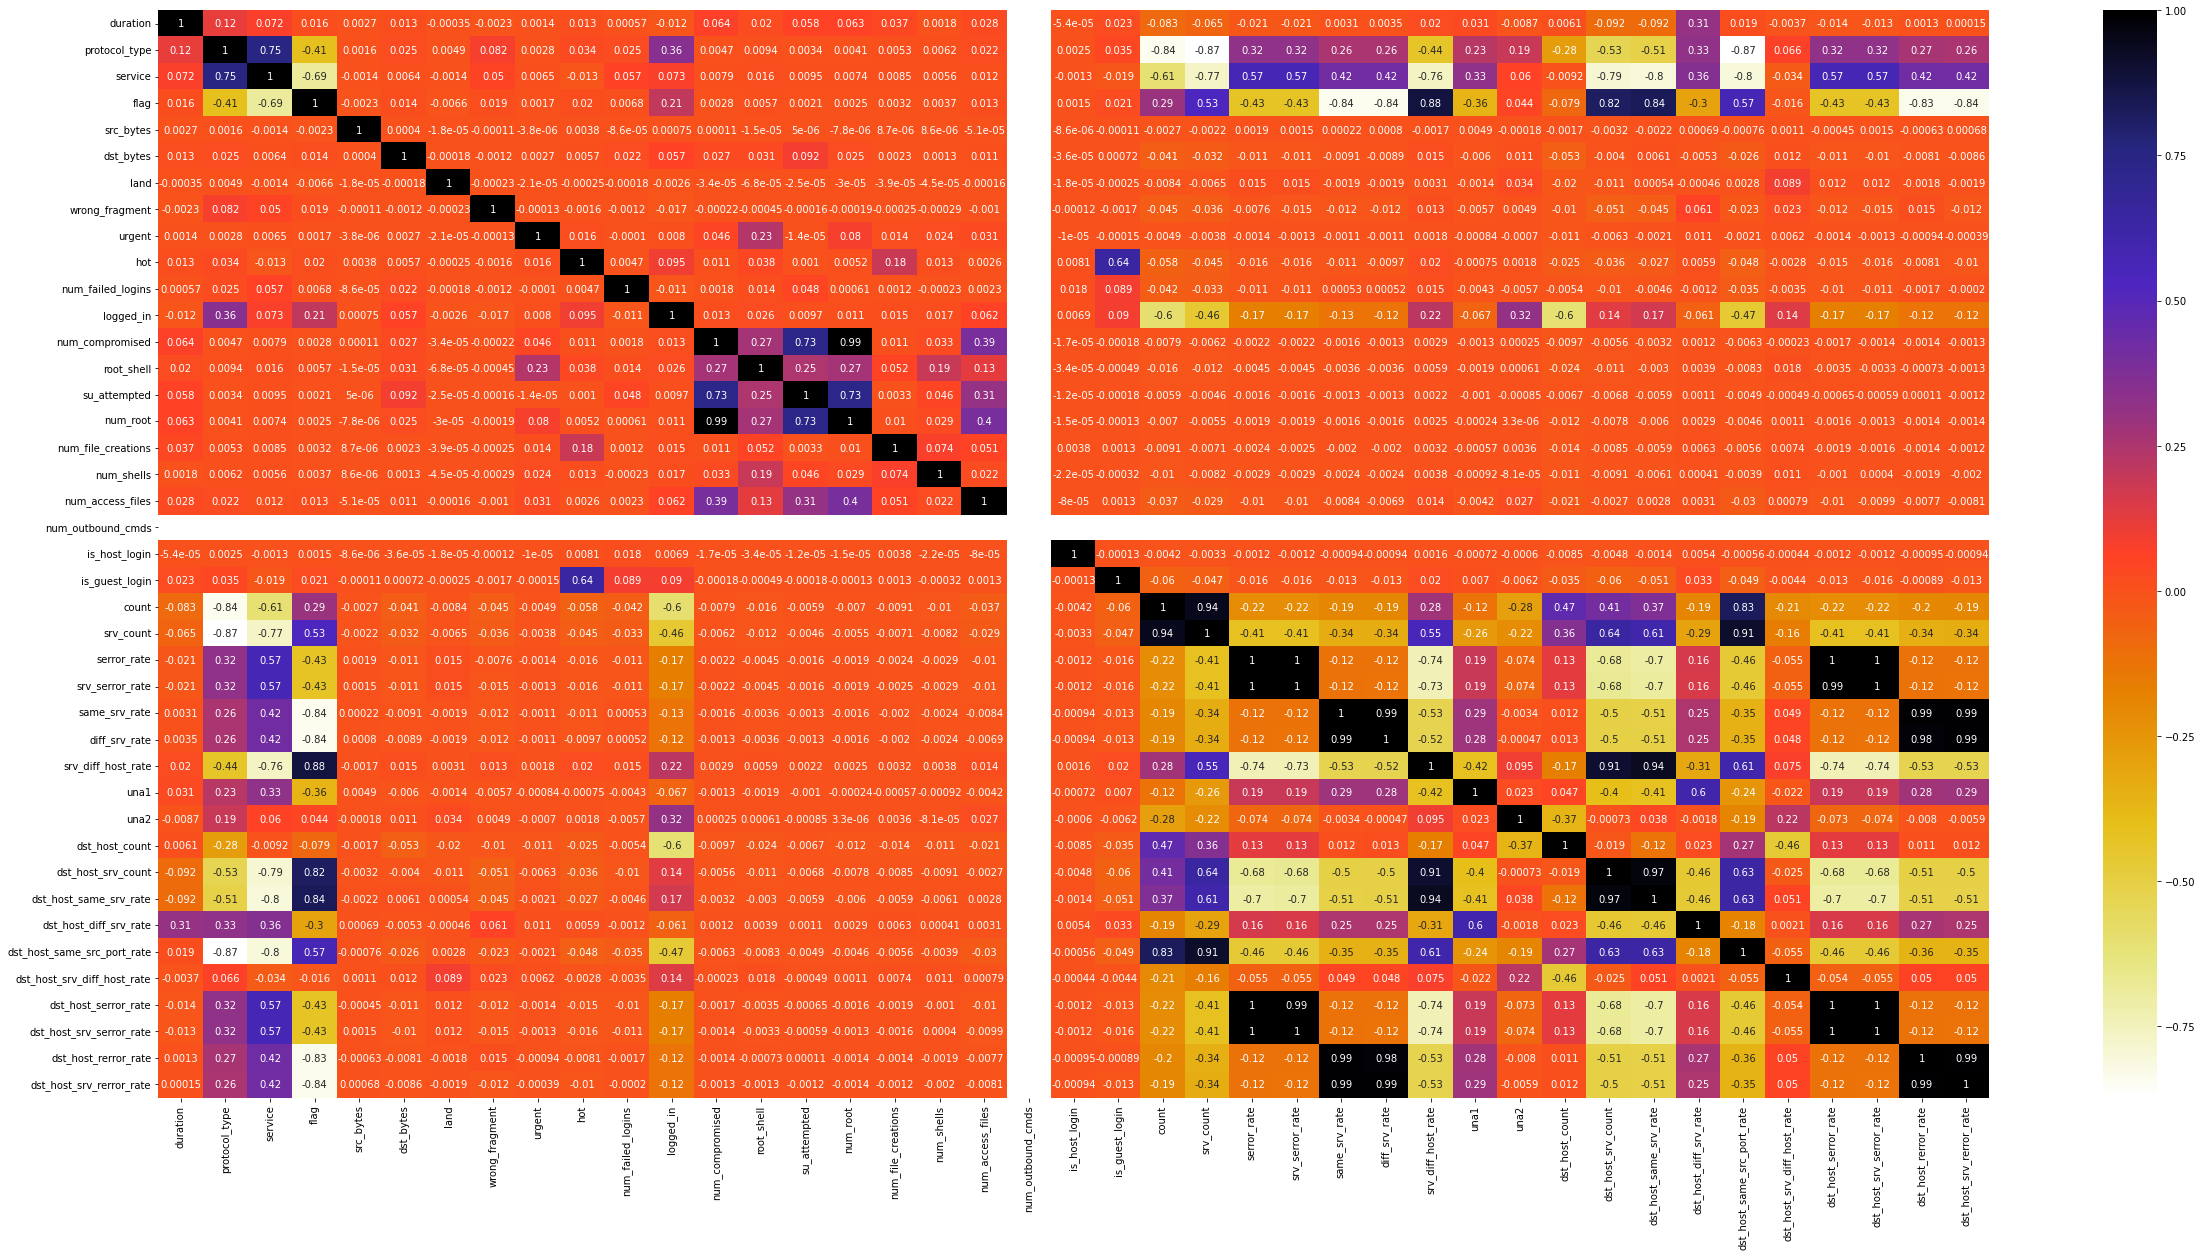

In [16]:
import seaborn as sns
plt.figure(figsize=(41,20))
cor = X_train.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [17]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr 


In [18]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

12

In [19]:
corr_features

{'diff_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'num_root',
 'srv_count',
 'srv_diff_host_rate',
 'srv_serror_rate'}

In [20]:
X_train= X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

**Feature Selection - INFORMATION GAIN**

In [21]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([1.89330291e-02, 2.02825417e-01, 3.86630116e-01, 1.14918280e-01,
       4.36777556e-01, 3.58621899e-01, 7.12612599e-04, 3.23840241e-04,
       6.08689061e-04, 2.52772324e-03, 1.11813376e-03, 2.36064145e-01,
       8.93124725e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.64388657e-04, 3.75184723e-04, 2.75060535e-04,
       0.00000000e+00, 4.03345352e-01, 3.43029381e-02, 6.81614624e-03,
       5.21071642e-02, 1.08382167e-01, 2.48711740e-01, 7.67945457e-02,
       1.71607688e-01])

In [22]:
mutual_info = pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

src_bytes                      0.436778
count                          0.403345
service                        0.386630
dst_bytes                      0.358622
dst_host_count                 0.248712
logged_in                      0.236064
protocol_type                  0.202825
dst_host_srv_diff_host_rate    0.171608
flag                           0.114918
una2                           0.108382
dst_host_diff_srv_rate         0.076795
una1                           0.052107
serror_rate                    0.034303
duration                       0.018933
same_srv_rate                  0.006816
hot                            0.002528
num_failed_logins              0.001118
num_access_files               0.000964
num_compromised                0.000893
land                           0.000713
urgent                         0.000609
num_outbound_cmds              0.000375
wrong_fragment                 0.000324
is_host_login                  0.000275
num_file_creations             0.000000


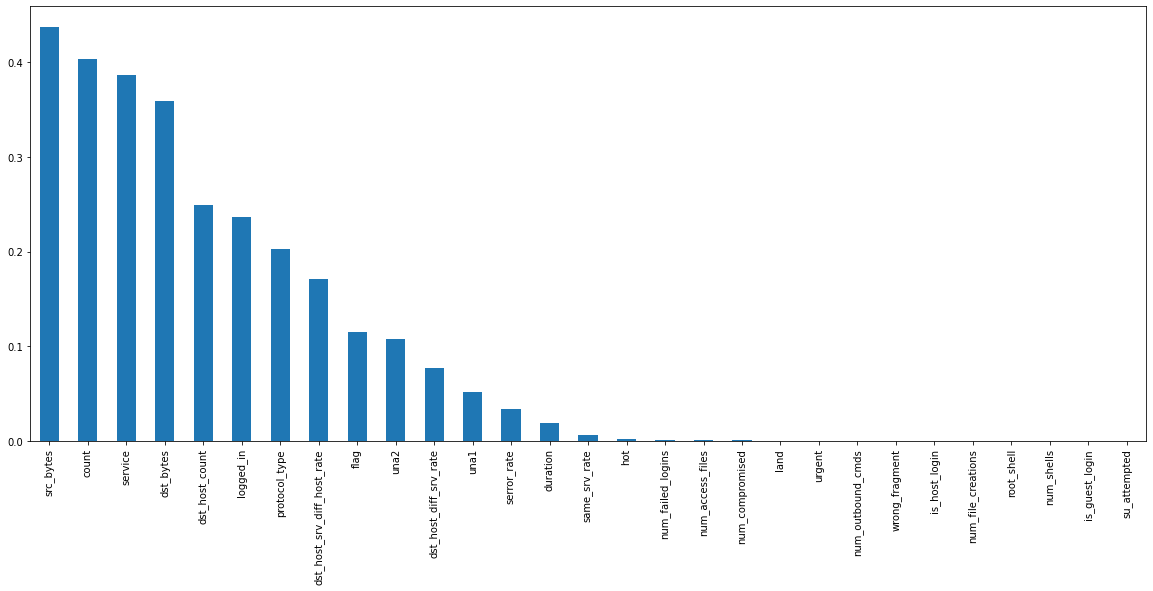

In [23]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [24]:
from sklearn.feature_selection import SelectKBest
sel_four_cols=SelectKBest(mutual_info_classif,k=7)
sel_four_cols.fit(X_train,y_train)
X_train.columns[sel_four_cols.get_support()]

Index(['service', 'src_bytes', 'dst_bytes', 'count'], dtype='object')

In [25]:
# def oversampling(df):
#   classes = df.result.value_counts().to_dict()
#   most = max(classes.values())
#   classes_list = []
#   for key in classes:
#     classes_list.append(df[df['result'] == key])
#   classes_sample = []
#   for i in range(1,len(classes_list)):
#     classes_sample.append(classes_list[i].sample(most,replace = True))
#   df_maybe = pd.concat(classes_sample)
#   final_df = pd.concat([df_maybe,classes_list[0]], axis=0)
#   final_df = final_df.reset_index(drop=True)
#   return final_df

In [26]:
# df = oversampling(df)

In [27]:
# pd.Series(df.result.value_counts(ascending=True))

In [28]:
# pd.Series(df.protocol_type.value_counts(ascending=True))

In [29]:
# def oversampling_proto(df):
#   classes = df.protocol_type.value_counts().to_dict()
#   most = max(classes.values())
#   classes_list = []
#   for key in classes:
#     classes_list.append(df[df['protocol_type'] == key])
#   classes_sample = []
#   for i in range(1,len(classes_list)):
#     classes_sample.append(classes_list[i].sample(most,replace = True))
#   df_maybe = pd.concat(classes_sample)
#   final_df = pd.concat([df_maybe,classes_list[0]], axis=0)
#   final_df = final_df.reset_index(drop=True)
#   return final_df

In [30]:
# pd.Series(df.result.value_counts(ascending=True))

In [31]:
icmp_df = df[df.loc[:,"protocol_type"] == "icmp"]
pd.Series(icmp_df.result.value_counts(ascending=True))

Series([], Name: result, dtype: int64)

In [32]:
tcp_df = df[df.loc[:,"protocol_type"] == "tcp"]
pd.Series(tcp_df.result.value_counts(ascending=True))

Series([], Name: result, dtype: int64)

In [33]:
udp_df = df[df.loc[:,"protocol_type"] == "udp"]
pd.Series(udp_df.result.value_counts(ascending=True))

Series([], Name: result, dtype: int64)

In [34]:
features = ["service","src_bytes","dst_bytes","count"]
target = "result"

In [35]:
# check version number
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek  
from sklearn.model_selection import train_test_split
from collections import Counter
def x_y(df_given):
  X = df_given.loc[:,features]
  y = df_given.loc[:,target]
  counter = Counter(y)
  print("before: ",counter)
  oversample = ADASYN(random_state = 1)
  X,y = oversample.fit_resample(X,y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
  counter = Counter(y)
  print("after: ",counter)
  return X_train, X_test, y_train, y_test

In [36]:
# # check version number
# from imblearn.over_sampling import SMOTE, ADASYN
# from imblearn.combine import SMOTEENN, SMOTETomek  
# from sklearn.model_selection import train_test_split

# # oversample = SMOTETomek(random_state = 1)
# oversample = ADASYN(random_state = 1)
# X,y = oversample.fit_resample(X,y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
# counter = Counter(y)
# print("after: ",counter)

In [37]:
# icmp_df = oversampling(icmp_df)
# pd.Series(icmp_df.result.value_counts(ascending=True))

In [38]:
# tcp_df = df[df.loc[:,"protocol_type"] == "tcp"]
# pd.Series(tcp_df.result.value_counts(ascending=True))

In [39]:
# udp_df = df[df.loc[:,"protocol_type"] == "udp"]
# pd.Series(udp_df.result.value_counts(ascending=True))

In [40]:
# from sklearn.model_selection import train_test_split

# X = icmp_df.loc[:,features]
# y = icmp_df.loc[:,target]

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [42]:
models = [LogisticRegression()]#, KNeighborsClassifier(n_neighbors=3),MLPClassifier(alpha=0.005),DecisionTreeClassifier()]
classifiers = ["LR"]#, "KNN","MLP","DecisionTree"]
scores = []

In [43]:
def ml_model(X_train, X_test, y_train, y_test):
  for model in models:
      model.fit(X_train,y_train)
      y_pred = model.predict(X_test)
      score = accuracy_score(y_test, y_pred)*100
      scores.append(score)
      print("Accuracy of  model is: ", score)
      conf_matrix = confusion_matrix(y_test,y_pred)
      report = classification_report(y_test,y_pred)
      print("Confusion Matrix:\n",conf_matrix)
      print("Report:\n",report)
      print("\n==============***===============")

In [44]:
X_train, X_test, y_train, y_test = x_y(icmp_df)
ml_model(X_train, X_test, y_train, y_test)

before:  Counter()


ValueError: ignored

In [ ]:
X_train, X_test, y_train, y_test = x_y(tcp_df)
ml_model(X_train, X_test, y_train, y_test)

In [ ]:
X_train, X_test, y_train, y_test = x_y(udp_df)
ml_model(X_train, X_test, y_train, y_test)